<a href="https://colab.research.google.com/github/nabilaekasd/EDA-Superstore/blob/main/EDA_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Dataset

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1potnZQuUPEKQDhWv4G4AhIw3k1l0ywvP4pLq8d5vRWk/export?format=csv'
df = pd.read_csv(url)


In [ ]:
print(df.describe())

            Row ID   Postal Code     Quantity     Discount
count  9994.000000   9994.000000  9994.000000  9994.000000
mean   4997.500000  55190.379428     3.789574     0.156203
std    2885.163629  32063.693350     2.225110     0.206452
min       1.000000   1040.000000     1.000000     0.000000
25%    2499.250000  23223.000000     2.000000     0.000000
50%    4997.500000  56430.500000     3.000000     0.200000
75%    7495.750000  90008.000000     5.000000     0.200000
max    9994.000000  99301.000000    14.000000     0.800000


In [ ]:
#@title Cek Sturktur Data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   object 
 18  Quantity

In [ ]:
print(df['Sales'].apply(type).value_counts())

Sales
<class 'str'>    9994
Name: count, dtype: int64


In [ ]:
#@title Ubah Tipe Data

#Kolom tanggal ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

#konversi kolom sales
df['Sales'] = df['Sales'].str.replace('[^\d.]','', regex=True) #hilangkan karakter selain angka & titik
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

#konversi kolom profit
df['Profit'] = df['Profit'].str.replace('[^\d.-]','', regex=True) #hilangkan simbol non-numerik
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

print(df[['Order Date','Ship Date', 'Sales', 'Profit']].dtypes)
print(df[['Sales','Profit']].describe())

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
Sales                float64
Profit               float64
dtype: object
              Sales       Profit
count   9806.000000  9285.000000
mean     201.398936    71.001338
std      559.079018   244.792265
min        0.990000 -3399.980000
25%       16.900000     2.324400
50%       51.750000     8.294400
75%      196.620000   124.200000
max    22638.480000  4946.370000


In [ ]:
print("Missing Value per Kolom:")
print(df.isnull().sum())
print("\nTotal Missing Value:", df.isnull().sum().sum())

Missing Value per Kolom:
Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales            188
Quantity           0
Discount           0
Profit           709
dtype: int64

Total Missing Value: 897


In [ ]:
df = df[~df['Sales'].isna()]

In [ ]:
filtered_df = df[df['Discount'] > 0].copy()


median_profit = filtered_df['Profit'].median()


filtered_df['Profit'] = filtered_df['Profit'].fillna(median_profit)

In [ ]:
print("\nJumlah duplikat data:", df.duplicated().sum())


Jumlah duplikat data: 0


In [ ]:
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns
print("\nJumlah Outlier per Kolom (metode IQR):")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"- {col}: {len(outliers)}")



Jumlah Outlier per Kolom (metode IQR):
- Row ID: 0
- Postal Code: 0
- Sales: 1112
- Quantity: 160
- Discount: 844
- Profit: 1655


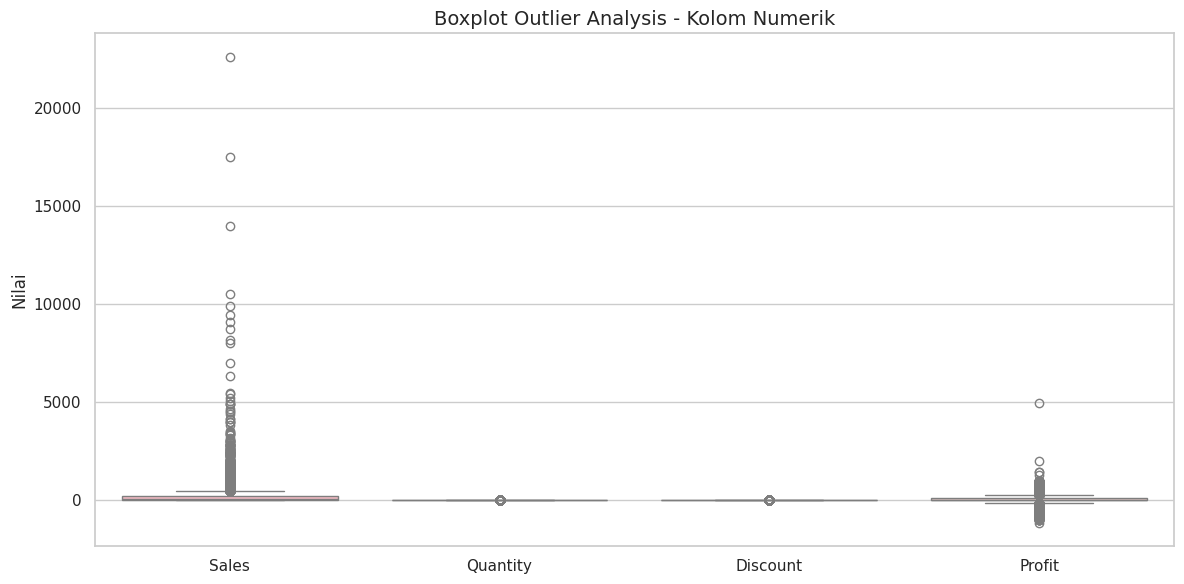

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom numerik yang ingin divisualisasikan
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Set tema dan warna pastel
sns.set(style="whitegrid", palette="pastel")
pastel_colors = ['#fbb1bd', '#dab4f0', '#c2e0f7', '#f8d0cb']
# Plot boxplot untuk tiap kolom
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], palette=pastel_colors)
plt.title('Boxplot Outlier Analysis - Kolom Numerik', fontsize=14)
plt.ylabel('Nilai')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")

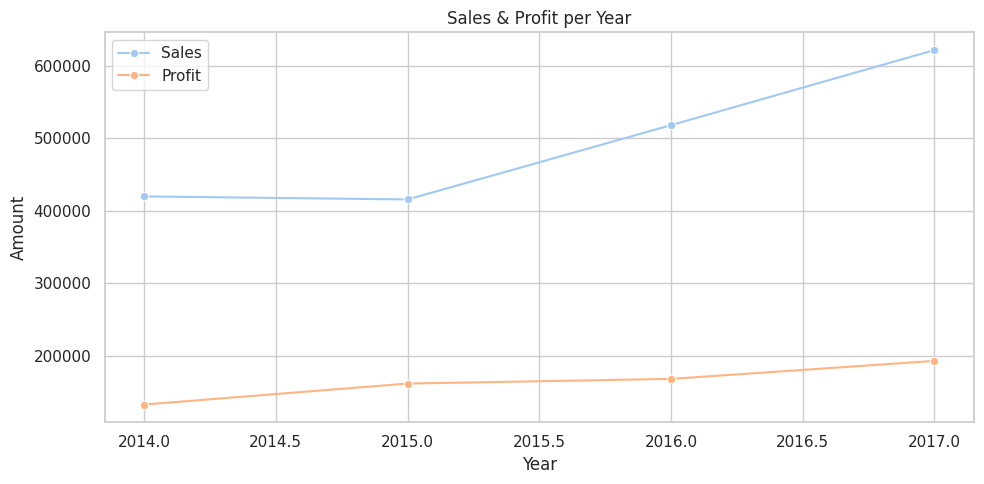

In [ ]:
#@title Tren Penjualan dan Profit per Tahun

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Order Year'] = df['Order Date'].dt.year

yearly = df.groupby('Order Year')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x='Order Year', y='Sales', marker='o', label='Sales')
sns.lineplot(data=yearly, x='Order Year', y='Profit', marker='o', label='Profit')
plt.title('Sales & Profit per Year')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

**Sales**

Adanya peningkatan penjualan dari tahun ke tahun (2014-2017). Pada tahun 2014, total penjualan berada di bawah 400,000. Di tahun 2015, terjadi peningkatan signifikan, dan tren terus berlanjut hingga 2017 dengan total penjualan lebih dari 600,000 yang menunjukkan pertumbuhan bisnis yang positif dalam hal revenue.

**Profit**

Meskipun penjualan meningkat, profit mengalami peningkatan yang tidak sebanding dengan sales. Garis profit relatif datar dengan peningkatan sangat kecil setiap tahun. Meskipun perusahaan menjual lebih banyak, keuntungan yang diperoleh tidak meningkat secara signifikan.

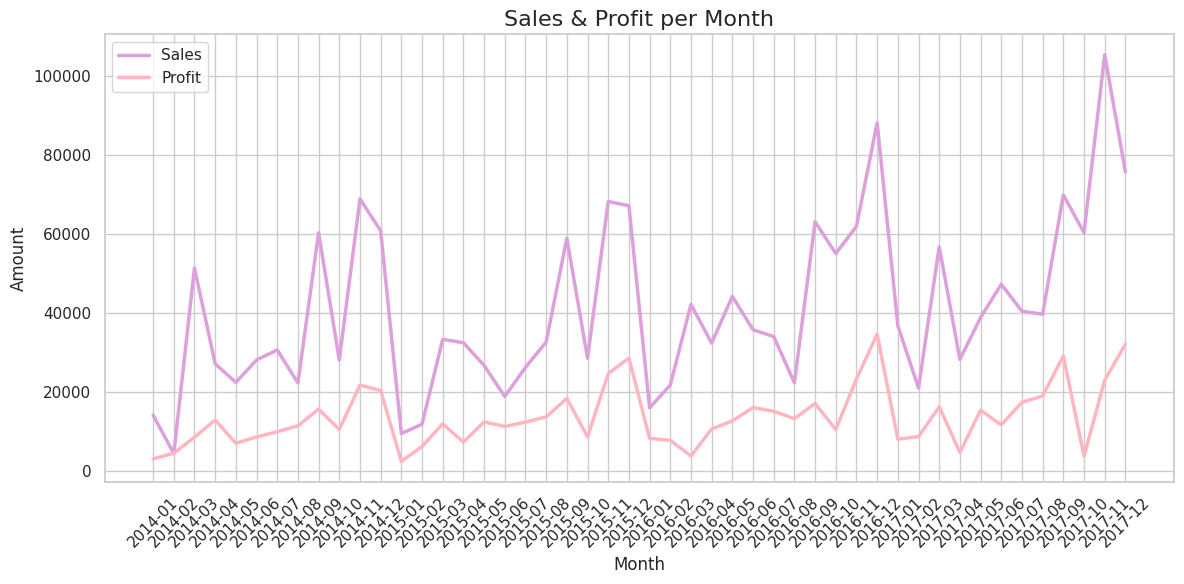

In [ ]:
#@title Sales & Profit per Bulan

# Buat kolom bulan (format: YYYY-MM)
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Agregasi sales & profit per bulan
monthly_data = (
    df.groupby('Month')[['Sales', 'Profit']]
    .sum()
    .reset_index()
    .sort_values('Month')
)

# Visualisasi line chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=monthly_data, x='Month', y='Sales', label='Sales', color='#dda0dd', linewidth=2.5)
sns.lineplot(data=monthly_data, x='Month', y='Profit', label='Profit', color='#ffb6c1', linewidth=2.5)

plt.title('Sales & Profit per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Adanya lonjakan penjualan yang signifikan di bulan Oktober hingga desember, terutama pada tahun 2017. Kenaikan ini berkaitan dengan event besar di AS, seperti Halloween (Oktober), Black Friday dan Cyber Monday (November), dan Natal (Desember).

Meskipun mengalami lonjakan yang signifikan, tetapi profit tidak menunjukkan kenaikan yang sebanding.

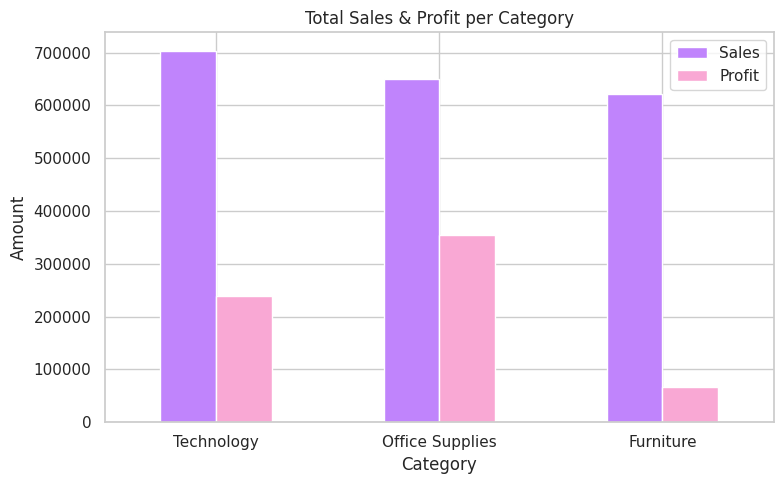

In [ ]:
#@title Sales & Profit per Kategori Produk

category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

category_summary.plot(
    kind='bar',
    figsize=(8,5),
    color=['#c084fc', '#f9a8d4']
)
plt.title('Total Sales & Profit per Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Technology**
*   Memiliki penjualan tertinggi dibanding kategori lain (±700,000)
*   Profit relatif rendah dibanding penjualannya (sekitar 250,000)

**Office Supplies**
*   Penjualan sedikit lebih rendah dari Technology
*   Memiliki profit tertinggi di antara ketiganya (sekitar 350,000)

**Furniture**
*   Memiliki penjualan paling rendah, tetapi masih mendekati dua kategori
*   Profitnya sangat rendah dibanding kategori lain (kurang dari 100,000)



<ipython-input-8-8dbd5ea8e8ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Profit_Margin'] = df_filtered['Profit'] / df_filtered['Sales'] * 100


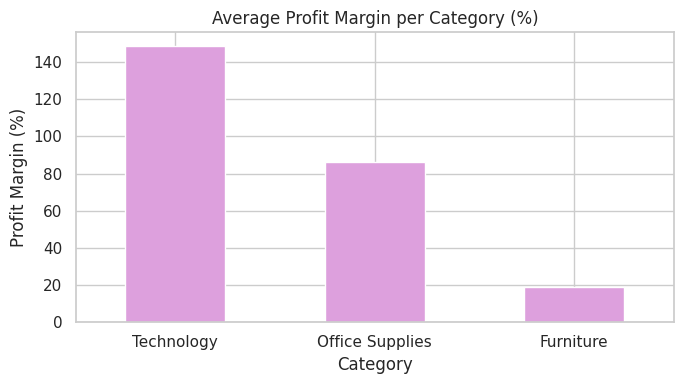

In [ ]:
#@title Profit per Category

# Hapus baris yang sales-nya nol atau tidak valid
df_filtered = df[(df['Sales'] != 0) & (~df['Sales'].isna()) & (~df['Profit'].isna())]

# Hitung profit margin
df_filtered['Profit_Margin'] = df_filtered['Profit'] / df_filtered['Sales'] * 100

# Rata-rata profit margin per kategori
category_profit_margin = df_filtered.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=False)

# Plot
category_profit_margin.plot(kind='bar', color='#dda0dd', figsize=(7, 4))
plt.title('Average Profit Margin per Category (%)')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Kategori Furniture memiliki margin profit paling rendah, berkisar 19% yang mengindikasikan bahwa meskipun memiliki volume penjualan yang tinggi, keuntungannya sangat kecil.

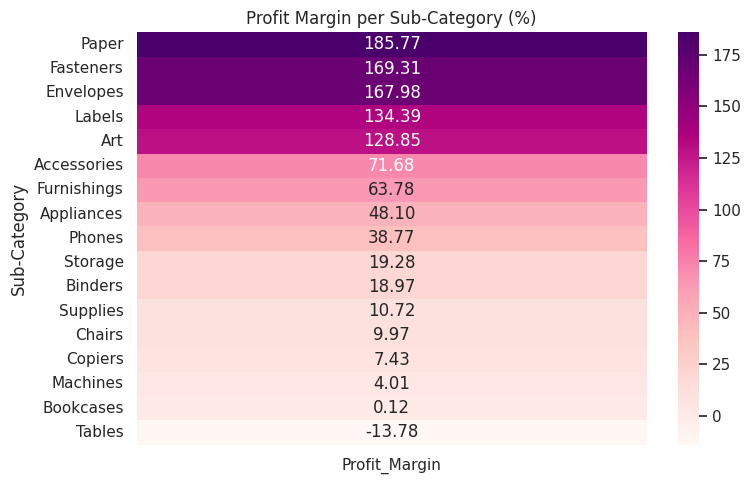

In [ ]:
#@title Profit Margin vs Sub-Category

subcategory_margin = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()
subcategory_margin['Profit_Margin'] = subcategory_margin['Profit'] / subcategory_margin['Sales'] * 100

plt.figure(figsize=(8, 5))
sns.heatmap(subcategory_margin[['Profit_Margin']].sort_values('Profit_Margin', ascending=False),
            annot=True, cmap='RdPu', fmt=".2f")
plt.title('Profit Margin per Sub-Category (%)')
plt.tight_layout()
plt.show()

Sub kategori Tables memiliki margin negatif sebesar -13.78% yang mengalami kerugian. Sub kategori lain, seperti Bookcases, Machines, dan Copiers juga memiliki margin yang sangat kecil, mendekati 0%.

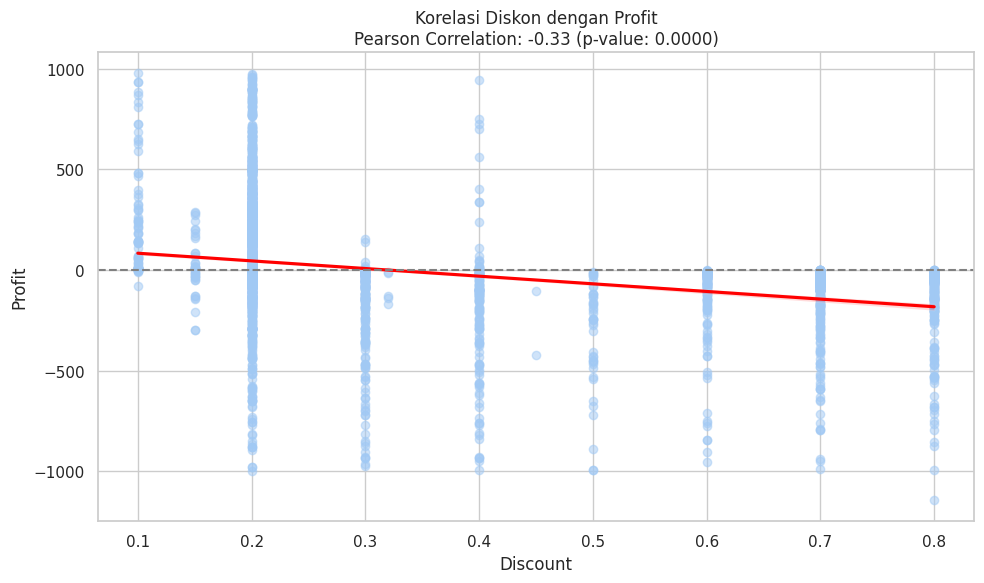

In [ ]:
#@title Korelasi Diskon & Profit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Pastikan kolom numerik
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Filter data: hanya nilai diskon > 0 dan hilangkan NaN
filtered_df = df[(df['Discount'] > 0) & df['Discount'].notna() & df['Profit'].notna()].copy()

# Validasi sebelum korelasi
if len(filtered_df) < 2:
    print("Tidak cukup data untuk korelasi.")
elif filtered_df['Discount'].nunique() <= 1 or filtered_df['Profit'].nunique() <= 1:
    print("Salah satu kolom bernilai konstan, korelasi tidak bisa dihitung.")
else:
    # Hitung korelasi Pearson
    corr_value, p_value = pearsonr(filtered_df['Discount'], filtered_df['Profit'])

    # Buat scatter plot + garis tren
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=filtered_df,
        x='Discount',
        y='Profit',
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )

    # Judul dan label
    plt.title(f'Korelasi Diskon dengan Profit\nPearson Correlation: {corr_value:.2f} (p-value: {p_value:.4f})')
    plt.xlabel('Discount')
    plt.ylabel('Profit')
    plt.axhline(0, color='gray', linestyle='--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Terdapat korelasi negatif, meskipun tidak terlalu kuat, tetapi hasilnya cukup jelas bahwa pemberian diskon berlebihan dapat menurunkan margin profit.

<ipython-input-15-80fe3de15729>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='pastel')


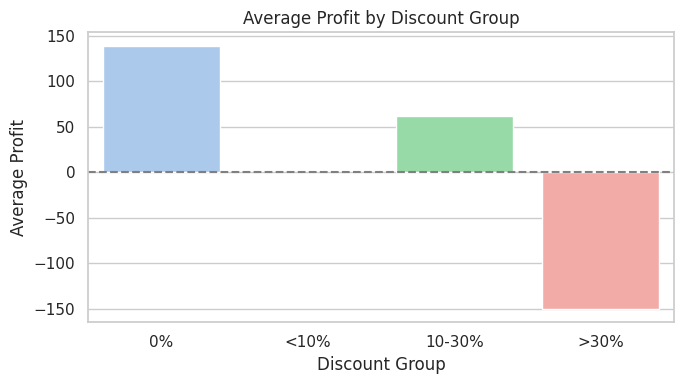

In [ ]:
#@title Rata-rata Profit per Kelompok Diskon

def discount_category(d):
  if d == 0:
    return '0%'
  elif d < 0.1:
    return '<10%'
  elif d < 0.3:
    return '10-30%'
  else:
    return '>30%'

df['Discount_Group'] = df['Discount'].apply(discount_category)

avg_profit = df.groupby('Discount_Group')['Profit'].mean().reindex(['0%', '<10%', '10-30%', '>30%'])

plt.figure(figsize=(7,4))
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='pastel')
plt.title('Average Profit by Discount Group')
plt.xlabel('Discount Group')
plt.ylabel('Average Profit')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

Pemberian diskon >30% rata-rata memiliki profit negatif yang mengindikasikan adanya kerugian pada transaksi dengan diskon tinggi.

Average Profit with High Discount: -140.11306888888888
Average Profit with No or Low Discount: 96.82147966122349
T-statistic: -31.107095061506605
P-value: 4.422736841308885e-202


<ipython-input-39-3fce49c5cdb8>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Discount', y='Profit', data=df,


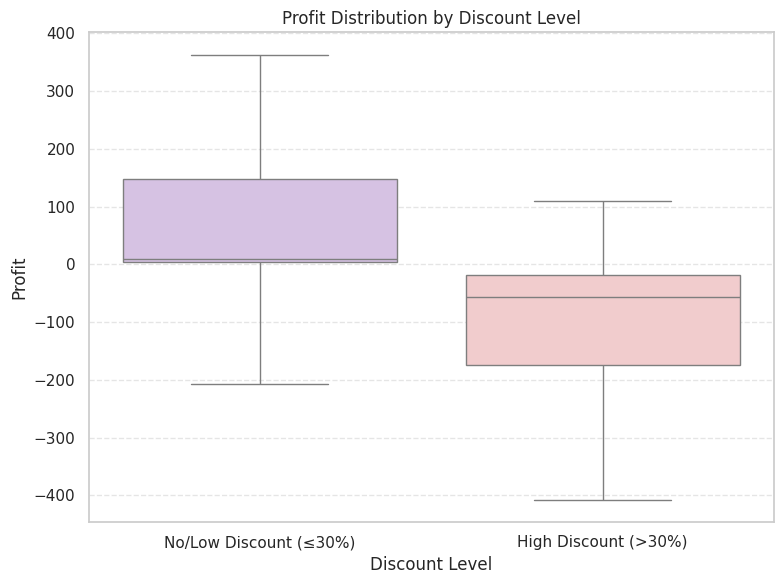

There is a statistically significant difference in profit between high discount and low/no discount groups.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan kolom baru
df['High_Discount'] = np.where(df['Discount'] > 0.30, 1, 0)

# Bagi data menjadi 2 kelompok
high_discount = df[df['High_Discount'] == 1]
low_or_no_discount = df[df['High_Discount'] == 0]

# Menghitung rata-rata profit
avg_profit_high = high_discount['Profit'].mean()
avg_profit_low = low_or_no_discount['Profit'].mean()

print(f'Average Profit with High Discount: {avg_profit_high}')
print(f'Average Profit with No or Low Discount: {avg_profit_low}')

# t-test
t_stat, p_value = stats.ttest_ind(high_discount['Profit'], low_or_no_discount['Profit'])
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# visualisasi
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Discount', y='Profit', data=df,
            showfliers=False,
            palette=sns.color_palette(['#d7bce8', '#f7c6c7']))

plt.title('Profit Distribution by Discount Level')
plt.xticks([0, 1], ['No/Low Discount (≤30%)', 'High Discount (>30%)'])
plt.xlabel('Discount Level')
plt.ylabel('Profit')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

if p_value < 0.05:
    print("There is a statistically significant difference in profit between high discount and low/no discount groups.")
else:
    print("There is no statistically significant difference in profit between high discount and low/no discount groups.")


Pemberian diskon besar cenderung menghasilkan profit yang lebih rendah dibandingkan dengan diskon kecil/tidak sama sekali.

Median profit untuk kelompok diskon besar juga berada di bawah 0 yang menandakan bahwa sebagian besar transaksi dengan diskon tinggi justru menyebabkan kerugian.

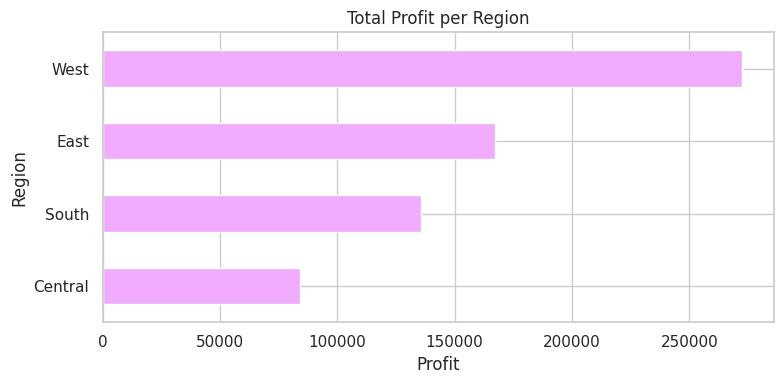

In [ ]:
#@title Profit berdasarkan Region

region_profit = df.groupby('Region')['Profit'].sum().sort_values()

region_profit.plot(
    kind='barh',
    figsize=(8,4),
    color='#f0abfc'
)
plt.title('Total Profit per Region')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

**Region West**
*   Profit tertinggi di antara seluruh region
*   Strategi penjualan di wilayah West paling efektif dalam menghasilkan profit

**Region East**
*   Berada di posisi kedua dalam hal profit
*   Menunjukkan performa baik, meski tertinggal cukup jauh dari West

**Region South**
*   Memiliki profit yang cukup rendah

**Region Central**
*   Menjadi wilayah dengan profit terendah




<ipython-input-38-6a1c7a434188>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


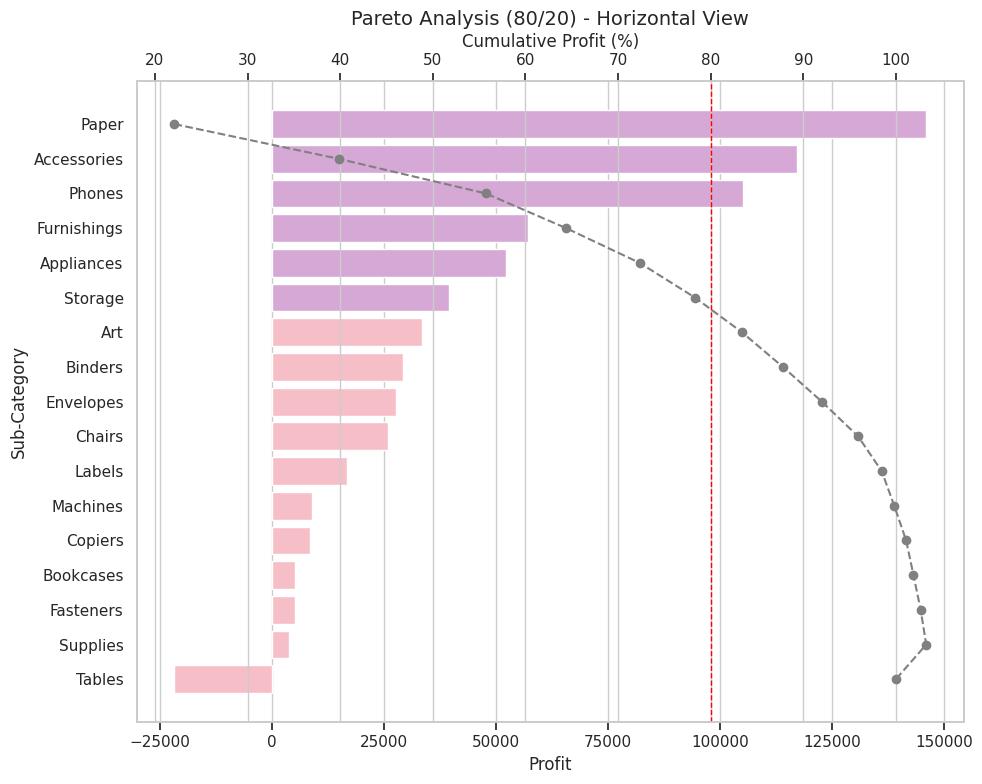

In [ ]:
#@title Sub-kategori dengan 80% profit (Contribution Analysis Pareto 80/20)

# Hitung total profit per sub-kategori
subcat_profit = (
    df.groupby('Sub-Category')['Profit']
    .sum()
    .reset_index()
    .sort_values('Profit', ascending=False)
)

# Hitung proporsi kumulatif
subcat_profit['Cumulative Profit %'] = subcat_profit['Profit'].cumsum() / subcat_profit['Profit'].sum() * 100
subcat_profit['Top 80%'] = subcat_profit['Cumulative Profit %'] <= 80

# Ukuran figure lebih tinggi agar label muat
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Barplot horizontal profit
sns.barplot(
    data=subcat_profit,
    y='Sub-Category',
    x='Profit',
    palette=['#dda0dd' if x else '#ffb6c1' for x in subcat_profit['Top 80%']]
)

# Garis kumulatif di sumbu X atas
ax2 = plt.gca().twiny()
ax2.plot(subcat_profit['Cumulative Profit %'], subcat_profit['Sub-Category'],
         color='gray', marker='o', linestyle='--')
ax2.axvline(80, color='red', linestyle='--', linewidth=1)
ax2.set_xlabel('Cumulative Profit (%)')

plt.title('Pareto Analysis (80/20) - Horizontal View', fontsize=14)
plt.tight_layout()
plt.show()

Hanya ada 3 sub-kategori yang melewati garis merah vertikal, yaitu Paper, Accessories, dan Phones.

Ketiganya merupakan top-performer dan menyumbang >80% dari total profit secara kumulatif.

Sedangkan sub-kategori Tables menunjukkan nilai profit negatif (hampir menyentuh -25.000). Artinya, setiap kali ada penjualan produk "Tables", secara keseluruhan perusahaan mengalami kerugian daripada keuntungan.


In [ ]:
from scipy import stats

# Hapus baris yang mengandung NaN pada kolom Profit
high_discount = df[df['High_Discount'] == 1].dropna(subset=['Profit'])
low_or_no_discount = df[df['High_Discount'] == 0].dropna(subset=['Profit'])

# Lakukan t-test kembali
t_stat, p_value = stats.ttest_ind(high_discount['Profit'], low_or_no_discount['Profit'], equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -32.12121678646317
P-value: 5.96419089669776e-166
